# 1. Project information

**Project title**: Finding Bach: Computational Musicology

**Name:** Andrew A. Sanchez

**Email address associated with your DataCamp account:** inbox.asanchez@gmail.com

**Project description**: How can programming and data science enhance our understanding and appreciation of music?  In this project we will write a program to find the B-A-C-H motif in a corpus of musical scores.

The B-A-C-H motif is perhaps the most ubiquitious musical cryptogram - a common way for composers to embed information in a score.  More than just a cryptogram, the motif is a musically rich and provocative gesture in and of itself.  Referenced in homage by many great composers such as Johannes Brahms, Robert Schumann and Arvo Pärt, the B-A-C-H motif is one among many strokes of genius that have rightfully immortalized J.S. Bach in the books of musical history. 

An extremely prolific composer, Bach's works are vast and complex.  Although there are many well known instances of the B-A-C-H motif, the tedium of finding them all would be overwhelming, especially if the motif is to be considered in all possible variations.  What if we wanted to know with certainty where it occurs, even across measures, voices etc..., and to gather precise and structured information regarding the musical context in which it occurs?  What if we wanted to ask these questions and more, not only of Bach's works, but other musical corpora as well?  It would be a gargantuan undertaking to say the least. Thankfully, there are some amazing tools to help us find Bach, wherever he may be hiding.

**Dataset(s) used**: The dataset for this project is a corpus containing of all of Bach's chorales in [MusicXML](https://www.musicxml.com/) format.

**Assumed student knowledge**: Although this project is beginner friendly, basic knowledge of music theory and python programming will be assumed.  Any intermediate-advanced skills/knowledge employeed will be carefully explained.

## 1. Python and musicology

![Stylized symbol of the BACH motif](./bach_motif.jpg)

First, we need to establish a basic familiarity with the tools we will use to write beautiful, computational musicology code in python.  [music21](http://web.mit.edu/music21/doc/) is a phenomal library developed by by Dr. Michael Cuthbert and his team at MIT. `music21`will 
provide us with the tools we need to find Bach.

Let's explore some of the classes we will use in our analysis.  We'll begin by grabbing a Bach chorale and examining how it is modeled in `music21`.

* Import the `music21` module for accessing musical corpora.
* Read in the chorale titled "Es stehn vor Gottes Throne."
* Which `music21` class is used to model the chorale in python?
* How many items are in the chorale? Is it the number you expected? What are the items? 
  * `music2` makes frequent use of list like objects which inherit some of the same methods that lists have.
* Get the following information about one these parts.
  * The class used to model the part
  * The number and type of objects in the part
  * The instrument name of the part

In [21]:
from music21 import corpus # Import the module for accessing musical corpora


# Get the chorale titled 'Es stehn vor Gottes Throne'
bwv309 = corpus.chorales.getByTitle('Es stehn vor Gottes Throne') 
print(type(bwv309)) # Which class is used to model the chorale?
print(len(bwv309))  # How many objects are in this variable?
for _ in bwv309:    # What are those objects?
    print(_)

# How does music21 represent each part?
# Take a closer look at one of the parts.
part = bwv309.parts[0]
for _ in part:
    print(type(_))

<class 'music21.stream.Score'>
9
<music21.text.TextBox "PDF © 2004...">
<music21.text.TextBox "BWV 309">
<music21.stream.Part Soprano>
<music21.stream.Part Alto>
<music21.stream.Part Tenor>
<music21.stream.Part Bass>
<music21.layout.ScoreLayout>
<music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>
<class 'music21.instrument.Instrument'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>
<class 'music21.stream.Measure'>


## 2. Take a closer look at our chorale


So far we have seen that `music21` loads our chorale into a `music21.stream.Score` object which, in addition to a few other things, contains four `music21.stream.Part` objects, one for each voice.  Pretty intuitive so far, right?

We can also see that each of these pieces exist within `music21.stream`.  We can think of the `music21.stream` in much the same way that we think of lists in python. In fact, `music21.stream` share some of the same methods that python lists do.  Let's take a closer look at these objects, which have several attributes and methods that we will rely on in our analysis.

* Unpack just the musically relevant pieces contained in the chorale into a variable.
* How many measures are in the chorale?
* Display a selection of measures.

[15, 15, 15, 15]
{<class 'music21.layout.PageLayout'>, <class 'music21.bar.Barline'>, <class 'music21.clef.TrebleClef'>, <class 'music21.note.Note'>, <class 'music21.layout.StaffLayout'>, <class 'music21.meter.TimeSignature'>, <class 'music21.key.Key'>, <class 'music21.bar.Repeat'>, <class 'music21.layout.SystemLayout'>}
g minor


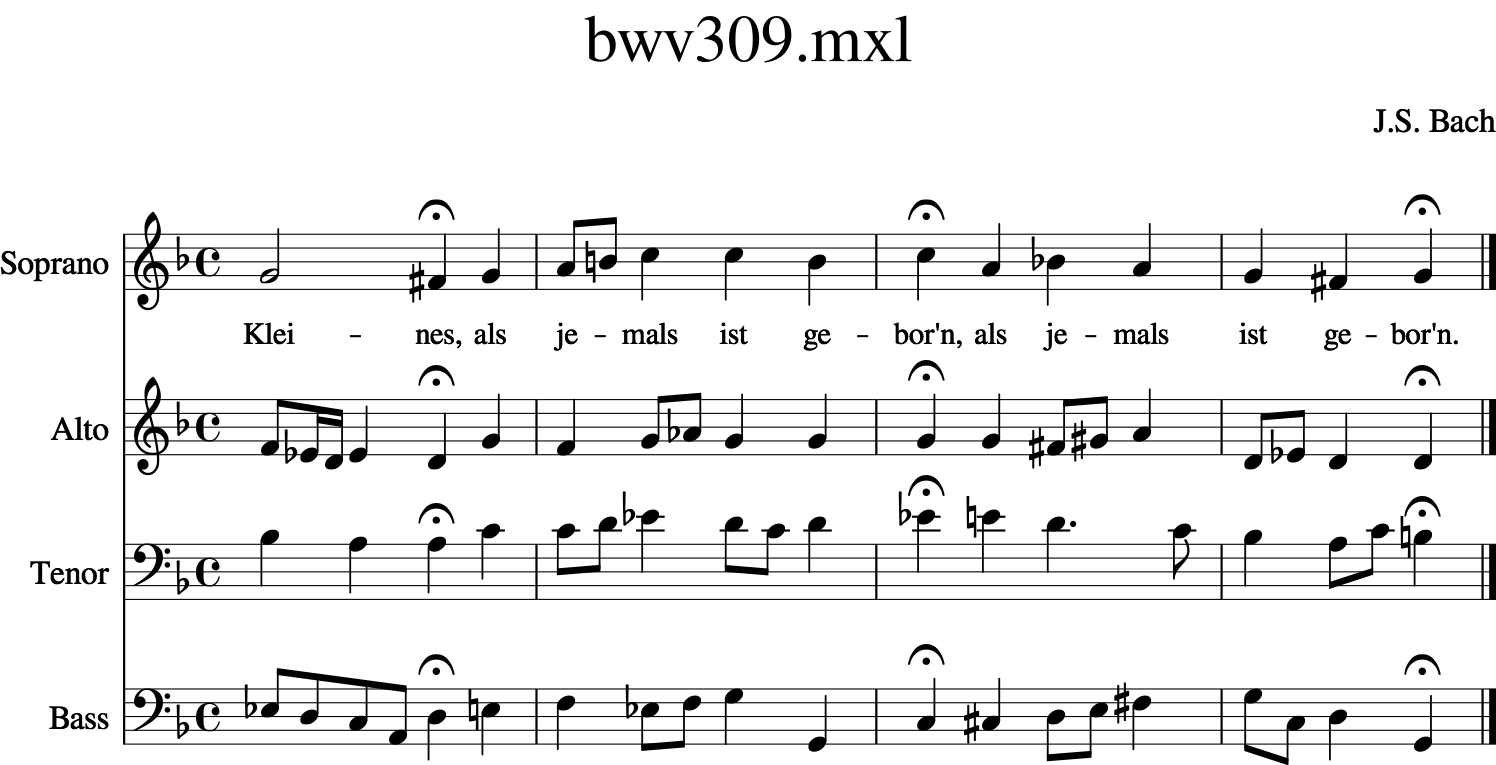

In [31]:
# Count the number of measures in each part.
print([len(part.getElementsByClass('Measure')) for part in bwv309.parts])

# Extract the measures from each part
soprano, alto, tenor, bass = [part.getElementsByClass('Measure') for part in bwv309.parts]

# What kind of unique objects are in one of the parts?
print(set([type(_) for _ in alto.flat]))

# What key is 'Es stehn vor Gottes Throne' in?
print(bwv309.analyze('key'))

# Let's extract the last four measures and display them
chorale_end = bwv309.measures(10, 13)
chorale_end.show()

## 3. Create a model of the BACH motif

Now that we have established a baseline of familiarity with `music21`, let's build a model of the BACH motif. We will use this model in our analysis to find the motif in a musical corpus containing all of Bach's chorales.

* Import the appropriate modules to create notes and a `Stream`.
* Create a list of strings representing the notes.
* Turn that list into a list of `music21.note` objects.
* Create a `music21.stream` and insert the notes into the stream.
* Display the stream.
* Display and listen to the MIDI.

In [ ]:
from music21 import note, stream
BACH = ['B-4', 'A4', 'C5', 'B4']
motif_notes = [note.Note(n) for n in BACH]
motif_score = stream.Stream()
for n in motif_notes:
    motif_score.append(n)
    
# motif_score.show()
# motif_score.show("midi")